<a href="https://colab.research.google.com/github/GollapalliLavanya/loan-/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 1: Create or Load a Dataset
# Simulated dataset for demonstration
data = {
    "Credit_Score": [750, 680, 610, 720, 580, 640, 800, 500, 670, 710, 550, 620],
    "Income": [60000, 40000, 30000, 80000, 20000, 35000, 90000, 15000, 45000, 50000, 22000, 34000],
    "Loan_Amount": [15000, 20000, 10000, 30000, 5000, 15000, 25000, 4000, 12000, 18000, 7000, 14000],
    "Loan_Term": [36, 60, 24, 48, 12, 36, 48, 12, 36, 48, 24, 36],
    "Debt_to_Income": [30, 45, 50, 20, 60, 40, 10, 70, 35, 25, 55, 42],
    "Payment_History": [95, 80, 70, 98, 60, 75, 99, 50, 85, 92, 65, 78],
    "Default": [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1]  # Target variable (0 = No Default, 1 = Default)
}

df = pd.DataFrame(data)

In [ ]:
# Step 2: Preprocess the Data
# Features and target variable
X = df.drop("Default", axis=1)  # Features
y = df["Default"]  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Step 3: Train a Machine Learning Model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.75
Precision: 0.50
Recall: 1.00
F1 Score: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Confusion Matrix:
[[2 1]
 [0 1]]


In [ ]:
# Step 6: Analyze Feature Importance
importances = model.feature_importances_
feature_names = df.drop("Default", axis=1).columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
print("\nFeature Importance:")
print(importance_df)




Feature Importance:
           Feature  Importance
1           Income    0.229885
4   Debt_to_Income    0.195402
0     Credit_Score    0.183908
5  Payment_History    0.160920
2      Loan_Amount    0.137931
3        Loan_Term    0.091954


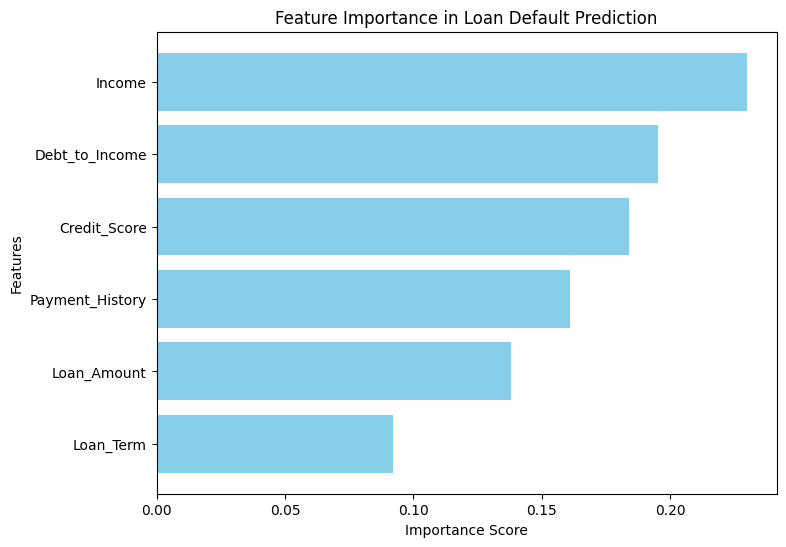

In [ ]:
# Plot Feature Importance (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Loan Default Prediction")
plt.gca().invert_yaxis()
plt.show()